# ROC Curve logistic regression x KNN_res

In [1]:
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
import math




In [2]:
arq = open('c:\\dados\\mimimi_raro.csv', 'r')
texto = arq.readlines()
arq.close()


lx1=[]
lx2=[]

X=[]
ly=[]

for l in texto:
   l1=l.split(";")
   lx1.append(float(l1[0]))
   lx2.append(float(l1[1]))
   ly.append(float(l1[2]))
   

   

X = list(zip(lx1,lx2))


X=np.array(X)

Y = ly
Y=np.array(Y)



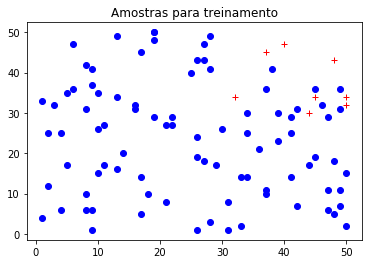

[[0.02345765 0.0146597 ]]
[-3.09625523]


In [4]:
#Gráfico com as amostras para treinamento

for i in range(len(X)):
    if(Y[i]==1.0):plt.plot(lx1[i],lx2[i],'r+')
    else:plt.plot(lx1[i],lx2[i],'bo')
plt.title('Amostras para treinamento')    
plt.show()

#É criado o objeto de classificação
#com Logistic Regression

logreg = linear_model.LogisticRegression()

#aprendizado
model=logreg.fit(X, Y)


#predição
Z=logreg.predict(X)

print(logreg.coef_)
print(logreg.intercept_)

scr=[]
for i in range(len(Y)):
    scr.append(1.0/(1+math.exp(-(-3.096+0.0234*lx1[i]+0.0146597*lx2[i]))))

fprx, tprx, thresholdsx = metrics.roc_curve(Y, scr, pos_label=1)
        


In [5]:
# Classificando com KNN


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,Y) 
score_knn=neigh.predict_proba(X)


score_1=[]
for i in range(len(Y)):
    score_1.append(score_knn[i][1])
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(Y, score_1, pos_label=1)




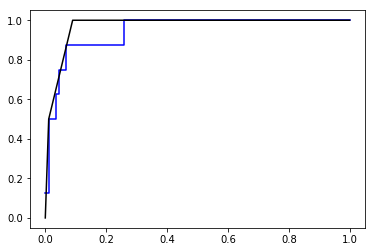

In [6]:
plt.plot(fprx,tprx,color='blue')
plt.plot(fpr_knn,tpr_knn,color='black')
plt.show()



In [8]:
print('AUC logistic=',metrics.auc(fprx,tprx))
print('AUC KNN=',metrics.auc(fpr_knn,tpr_knn))

AUC logistic= 0.9452247191011236
AUC KNN= 0.9719101123595506
